1. In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

    (a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that
    
    $$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$
    
    [Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

    (b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the lecture notes. Explicitly verify the anti-commutation relation
    
    $$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$
    
    for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
    commutation and anti-commutation relations (or otherwise), verify the identity:
    
    $$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  
    
    where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.
    
    (c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that
    
    $$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$
    
    Use this result to show that, in general,
    
    $$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$
    
    (d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
    calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:
    
    $$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$
    
    (e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

Text(0, 0.5, '$\\langle \\downarrow|\\hat{\\sigma}_{z,H}(t)|\\downarrow\\rangle$')

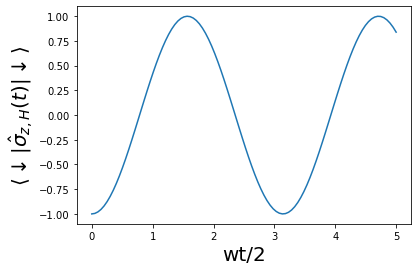

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,100)  #create a range of times
plt.plot(x,np.sin(x)**2-np.cos(x)**2)  #plot the times along x axis with expectation value along y axis
plt.xlabel('wt/2',size=20)             #same as analytical work I've called wt/2 = x
plt.ylabel(r'$\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$',size=20)

The expectation value oscillates between +=1

2. Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 
    
    (a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [2]:
hw= 0.2

sigz = np.matrix([[1,0],[0,-1]])
sigx = np.matrix([[0,1],[1,0]])
sigy = np.matrix([[0,-1j],[1j,0]]) #defining the pauli matrices
iden = np.matrix([[1,0],[0,1]])

H = hw*0.5*(sigx+sigy)/np.sqrt(2) #defining our hamiltonian

print(np.round(H**2-(hw*0.5)**2*iden,10))  # this should output a zero matrix if the above is to be verified
                                           # its just the above equation from (a) with the term on the right brought over
                                           # I'm rounding to 10 decimal places to ignore really small numbers

[[-0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j]]


As we see we get a zero matrix as desired

(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [3]:
down = np.array([0,1])
up = np.array([1,0])
#if this is an eigenstate we should see H|down> = a|down> for some scalar a

print('H*down = ', H.dot(down),'\n \n As we can see this is not of the desired form so it cannot be an eigenstate \n')

print('The true eigenvectors of H are \n',np.linalg.eig(H)[1])

H*down =  [[0.07071068-0.07071068j 0.        +0.j        ]] 
 
 As we can see this is not of the desired form so it cannot be an eigenstate 

The true eigenvectors of H are 
 [[ 0.5       -0.5j -0.5       +0.5j]
 [ 0.70710678+0.j   0.70710678+0.j ]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [4]:
from scipy.linalg import expm

def U(t):
    return expm(-1j*H*t) #define U[t]

def Udag(t):
    return expm(1j*H*t)  #define the Hermitian conjugate, taking hbar = 1

print('The time evolution operator for t = 0.05 is \n\n',U(0.05),'\n')

#now if U is unitary the following expression should equal the identity
print('U*U = \n',np.round(Udag(0.05)*U(0.05),4))    
      
print('We can see this equals the identity as desired')

The time evolution operator for t = 0.05 is 

 [[ 0.9999875 -3.22978094e-22j -0.00353552-3.53551917e-03j]
 [ 0.00353552-3.53551917e-03j  0.9999875 -2.59317043e-27j]] 

U*U = 
 [[1.-0.j 0.-0.j]
 [0.+0.j 1.-0.j]]
We can see this equals the identity as desired


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

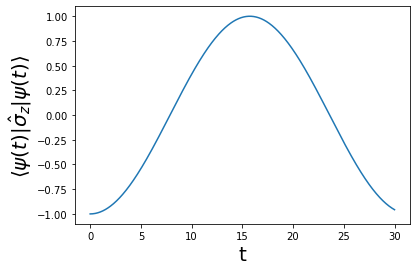

In [5]:
#create a list, with each element a vector that has been evolved by a timestep = 0.05
evo = [[0,1]] #the first element of the list is the unevolved state

#define the ending time
dt = 0.05
t = 30

sigz = np.array([[1,0],[0,-1]])
sigx = np.array([[0,1],[1,0]])
sigy = np.array([[0,-1j],[1j,0]])

for i in range(1,int(t/dt)):
    evo.append(U(dt).dot(evo[i-1]))
    
evo = np.array(evo) #casting the list to an array

expec = [np.conjugate(evo[i]).dot(sigz).dot(evo[i]) for i in range(len(evo))] #create a list of the expectation values                                                                         #of pauli z in each evolved state

x = np.linspace(0,30,int(t/dt)) #again create the list of times 

plt.plot(x,np.real(expec))      #I need only plot real part of expec as imaginary is always 0, this avoids annoying errors 
                                #about casting to real in the plot function
plt.xlabel('t',size=20)         
plt.ylabel(r'$\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$',size=20)
plt.show()

3. Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

    (a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation
	
    $$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$
    
    where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.
    
    (b) Show that the same equation can be expressed in the form
    
    $$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$
    
    and find an explicit expression for the matrix $\mathbf{M}$.
    
    (c) Convince yourself that the explicit solution of the above equation is 
    
    $$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$
    
    Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

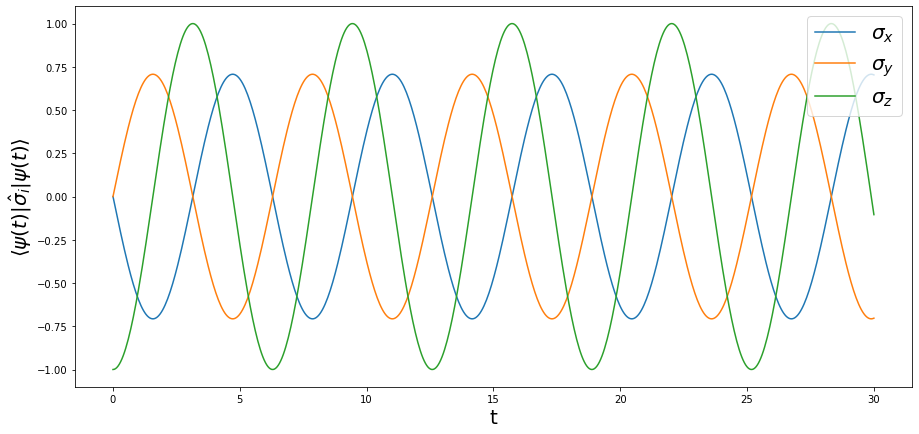

In [6]:
#first I create an s vector that is empty with the initial expected values for the down state
s = [[0,0,-1]]

#input the matrix m from the handwritten solutions, and define its exponential
m = np.array(([0,0,1],[0,0,-1],[-1,1,0]))/np.sqrt(2)

ex = expm(dt*m)

#apply the exponential to s and append to s itself, pretty much the same as before
for i in range(1,int(t/dt)):
    s.append(ex.dot(s[i-1]))
    
#convert whole thing to array to make plotting the columns easy
s = np.array(s)

plt.figure(figsize = (15,7))

#here we plot each column of s, as this is the values of sigx, sigy, sigz we want
labels = [r'$\sigma_{x}$',r'$\sigma_{y}$',r'$\sigma_{z}$']
x = np.linspace(0,t,int(t/dt))

for i in range(3):
    plt.plot(x,s[:,i],label = labels[i])
    plt.legend(fontsize=20,loc=1)
    
plt.xlabel('t',size=20)
plt.ylabel(r'$\langle \psi(t)|\hat{\sigma}_i|\psi(t)\rangle$',size=20)
plt.show()

4. Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

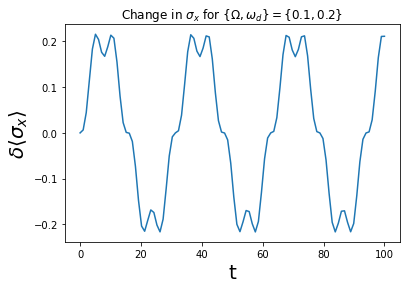

In [7]:
#defining convenient coordinates where w0=1
w0 = 1
Omega = 0.1
wd = 0.2
t = np.linspace(0,100,100)

#define the result from the pen and paper linear response theory
def deltax(t1):
    return 2*Omega*(w0*np.sin(wd*t1)-wd*np.sin(w0*t1))/(w0**2-wd**2)

#plot this change in pauli x as a function of time
plt.plot(t,deltax(t))
plt.title('Change in $\sigma_{x}$ for $\{\Omega , \omega_{d}\}=\{0.1,0.2\}$')
plt.xlabel('t',size=20)
plt.ylabel(r'$\delta \langle \sigma_{x} \rangle$',size=20)
plt.show()

5. A driven two-level system is described in the interaction picture by the Hamiltonian

    $$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

    where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix and derive analytical expressions for its eigenvalues and eigenvectors. Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

6. Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

    $$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$
    
    For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is
    
    $$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$
    
    where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that
    
    $$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      
   
    Now specialise to a driven qubit with Hamiltonian
    
    $$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

    Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

In [8]:
w0 = 1                                           #I will take hbar = 1 for all of this for simplicty, and define all my variables
wd = 0.99
Omega = 0.1
t = 100

tlist = np.linspace(0,t,int(t/dt))               #create list of times 
init = down                                      # I still have down vector saved from earlier

def Ham(t1):
    return np.matrix(1/2*w0*sigz+Omega*np.sin(wd*t1)*sigx)  #define my hamiltonian

states = []                                      #create a list to store evolved states
states.append(init)                              #append the initial state



for i in range(1,int(t/dt)):
    states.append(expm(-1j*dt*Ham(tlist[i-1])).dot(states[i-1]))  #creating the list of states

states = np.array(states)

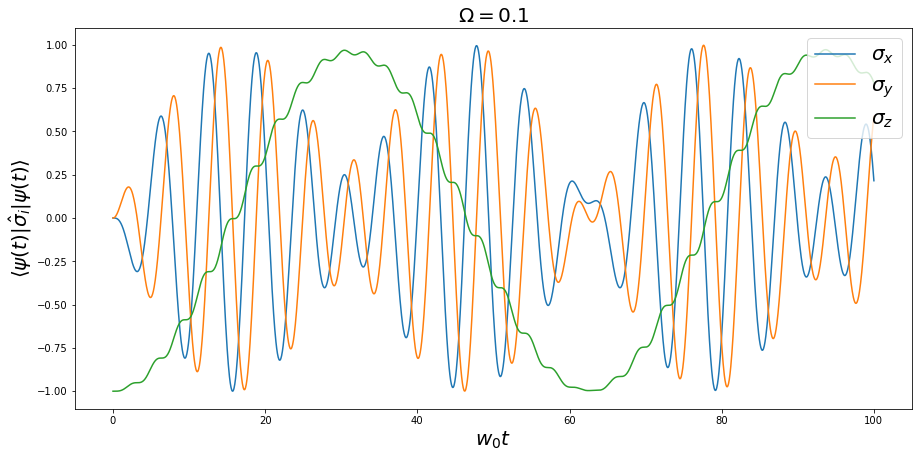

In [9]:
#first I create a list to store the expecation values of sigma x,y,z
s=[]

#here I define the expectation values of each operator for a given state
def expec_x(state):
    return np.conjugate(state).dot(sigx.dot(state))

def expec_y(state):
    return np.conjugate(state).dot(sigy.dot(state))

def expec_z(state):
    return np.conjugate(state).dot(sigz.dot(state))
    

#here I append a 3 component vector of expectation values to s for each state, essetially the bloch vector 
for state in states:
    s.append([expec_x(state),expec_y(state),expec_z(state)])
    
#converting to an array again so I can select columns easily 
s = np.array(s)

plt.figure(figsize = (15,7))

#here we plot each column of s, as this is the values of sigx, sigy, sigz we want
labels = [r'$\sigma_{x}$',r'$\sigma_{y}$',r'$\sigma_{z}$']
for i in range(3):
    plt.plot(tlist,np.real(s[:,i]),label = labels[i]) #here I cast to real to avoid annoying error message
    plt.legend(fontsize=20,loc=1)                     #despite the fact the imaginary part is 0 anyway the warning message
                                                      #was still appearing 
    
plt.xlabel(r'$w_{0}t$',size=20)
plt.ylabel(r'$\langle \psi(t)|\hat{\sigma}_i|\psi(t)\rangle$',size=20)
plt.title('$\Omega = 0.1$',size=20)
plt.show()

The rotating wave approximation is less valid in the case where the rabi frequency is large, as rapid oscillations can not be ignored as easily if they are happening on a larger scale. If we set $\Omega = w_{0}$ we can see the plots become extremely erratic in nature and the rotating wave approximation become less valid

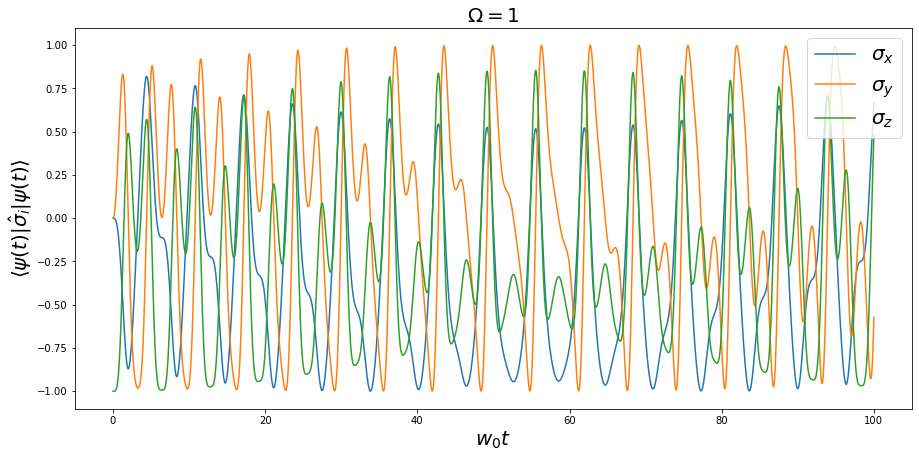

In [10]:
Omega = 1

states = []                                      #create a list to store evolved states
states.append(init)                              #append the initial state

for i in range(1,int(t/dt)):
    states.append(expm(-1j*dt*Ham(tlist[i-1])).dot(states[i-1]))  #creating the list of states

states = np.array(states)
s=[]

#here I append a 3 component vector of expectation values to s for each state, essetially the bloch vector 
for state in states:
    s.append([expec_x(state),expec_y(state),expec_z(state)])
    
#converting to an array again so I can select columns easily 
s = np.array(s)

plt.figure(figsize = (15,7))

#here we plot each column of s, as this is the values of sigx, sigy, sigz we want
labels = [r'$\sigma_{x}$',r'$\sigma_{y}$',r'$\sigma_{z}$']
for i in range(3):
    plt.plot(tlist,np.real(s[:,i]),label = labels[i]) #here I cast to real to avoid annoying error message
    plt.legend(fontsize=20,loc=1)                     #despite the fact the imaginary part is 0 anyway the warning message
                                                      #was still appearing 
    
plt.xlabel(r'$w_{0}t$',size=20)
plt.ylabel(r'$\langle \psi(t)|\hat{\sigma}_i|\psi(t)\rangle$',size=20)
plt.title('$\Omega = 1$',size=20)
plt.show()

7. Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    
(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

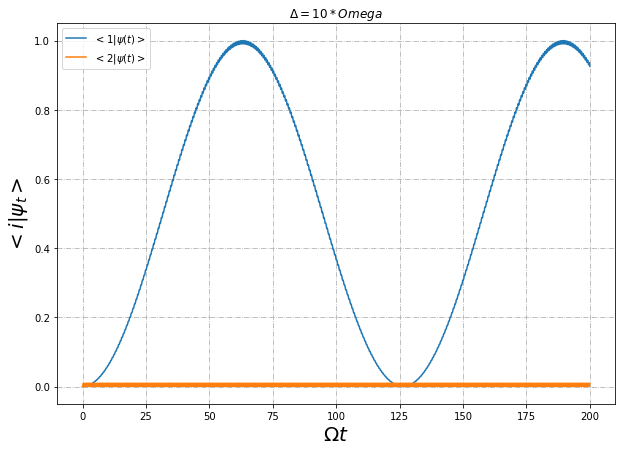

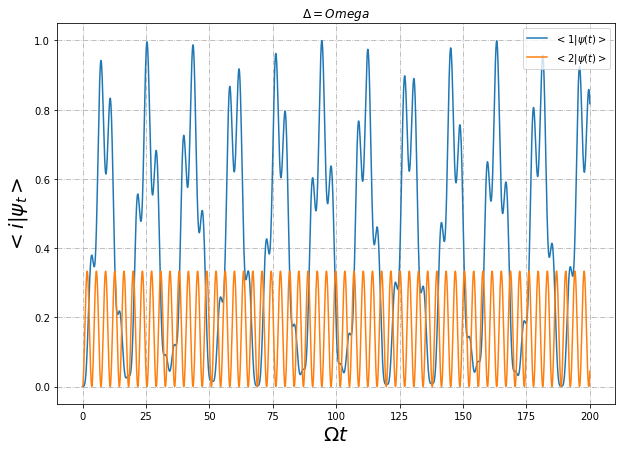

In [11]:
zero, one, two = np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1]) #define our basis states
Omega,Omega0,Omega1 = 1,1,1

t = 200   #set our final time
delta=[10*Omega,Omega] #our choices of delta

H0 = np.array([[0,0,Omega0/2],[0,0,Omega1/2],[Omega0/2,Omega1/2,delta[0]]])  #create different hamiltonians for different 
H1 =  np.array([[0,0,Omega0/2],[0,0,Omega1/2],[Omega0/2,Omega1/2,delta[1]]]) #detunings

states0 = [zero]  #different lists of evolved states for different hamiltonians
states1 = [zero]

tlist = np.linspace(0,t,int(t/dt))  #create list of times

for i in range(1,int(t/dt)):
    states1.append(expm(-1j*dt*H1).dot(states1[i-1]))  #apply time evolution in steps as before
    states0.append(expm(-1j*dt*H0).dot(states0[i-1]))


pops1 = [np.real(one.dot(state)*np.conjugate(one.dot(state))) for state in states0]  #this list is to store the overlap squared of |1> and |psi> when delta = 10omega
pops2 = [np.real(two.dot(state)*np.conjugate(two.dot(state))) for state in states0]

plt.figure(figsize=(10,7))
plt.plot(tlist,pops1,label='$<1|\psi(t)>$')
plt.plot(tlist,pops2,label='$<2|\psi(t)>$')
plt.xlabel('$\Omega t$',size=20)
plt.ylabel('$<i|\psi_{t}>$',size=20)
plt.title('$\Delta = 10*Omega$')
plt.grid(linestyle='-.')
plt.legend()


pops1 = [np.real(one.dot(state)*np.conjugate(one.dot(state))) for state in states1]  #the same again for delta = omega
pops2 = [np.real(two.dot(state)*np.conjugate(two.dot(state))) for state in states1]  #reusing list names = bad

plt.figure(figsize=(10,7))
plt.plot(tlist,pops1,label='$<1|\psi(t)>$')
plt.plot(tlist,pops2,label='$<2|\psi(t)>$')
plt.xlabel('$\Omega t$',size=20)
plt.ylabel('$<i|\psi_{t}>$',size=20)
plt.title('$\Delta = Omega$')
plt.grid(linestyle = '-.')
plt.legend()

plt.show()

As we can see when the detuning is much larger than the rabi frequency, the second excited state never become populated. However when the rabi frequency is large enough the second excited state becomes briefly populated and oscillates. The particle does not remain in the second excited state long and dops back down to the first state. 

8. (a) Construct the two-qubit Hamiltonian matrix

$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

In [12]:
#lets define our identity matrix, pauli matrices are already defined
identity = np.identity(2)
wa = 1
wb = 0.5
J = 0.5
V = 0.1

#now define the hamiltonian
H = -wa/2*np.kron(sigz,identity)-wb/2.*np.kron(identity,sigz)+J/4*(np.kron(sigx,sigx)+np.kron(sigy,sigy))+V/2*np.kron(sigz,sigz)
print(np.real(H),'\n')
#print(np.imag(H))    can print this out to show there is no imaginary component, so casting to real keeps things tidier

#now we can get the eigensystem , since H is hermitian it should have real eigenvales and vectors so I will cast to real
evals = np.real(np.linalg.eig(H)[0])
evecs = np.real(np.linalg.eig(H)[1])

print('The eigenvalues of H are',evals,'\n')
print('And the eigenvectors are \n',evecs)

print('Note the eigevectors are the columns of the above \n')


#now the ground state will be the eigenvector corresponding to the lowest eigenvalue, namely
minim = np.where(evals == min(evals))[0][0]  #the awkward [0][0] is due to np.where returning a tuple of arrays, I just want 
                                             #the number inside the first array as this is the index of the minimum val
    
ground = evecs[:,minim]                      #this selects out the column vector at the defined index

#now to find the overlap with the state |01>

zero_one = np.kron(up,down)                  #up and down are saved from earlier
print('The overlap between |01> and the ground state is ',np.dot(zero_one,ground))

[[-0.7   0.    0.    0.  ]
 [ 0.   -0.3   0.25  0.  ]
 [ 0.    0.25  0.2   0.  ]
 [ 0.    0.    0.    0.8 ]] 

The eigenvalues of H are [ 0.30355339 -0.40355339 -0.7         0.8       ] 

And the eigenvectors are 
 [[-0.          0.          1.          0.        ]
 [ 0.38268343  0.92387953  0.          0.        ]
 [ 0.92387953 -0.38268343  0.          0.        ]
 [-0.          0.          0.          1.        ]]
Note the eigevectors are the columns of the above 

The overlap between |01> and the ground state is  0.0


(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

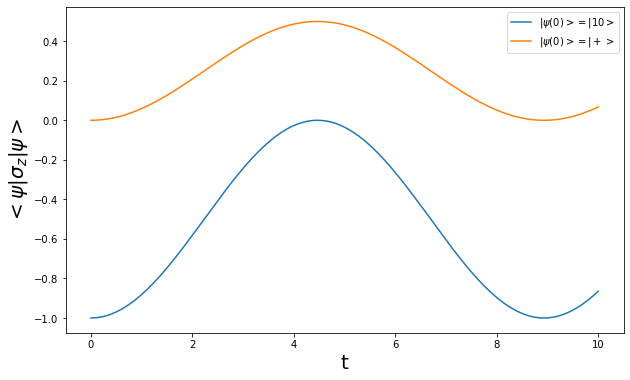

In [13]:
#first I will create a timestep, final time and initial state, and a list to store evolved states
dt = 0.05
t = 10
initial = np.kron(down,up)
states = [initial]
times = np.linspace(0,t,int(t/dt))

#here we append to our list of states the timestep evolved states
for i in range(1,len(times)):
    states.append(expm(-1j*H*dt).dot(states[i-1]))
    
#create a list to store the expectation values at each time, again can cast to real with no issues, casting whole thing to real
expec = [np.real(np.conjugate(x).dot(np.kron(sigz,identity).dot(x))) for x in states]

plt.figure(figsize = (10,6))
plt.plot(times,expec,label = '$|\psi(0)> = |10>$')


#here I just redefine the initial state and do it all again
initial = np.kron(down+up,up)/np.sqrt(2)
states = [initial]

for i in range(1,len(times)):
    states.append(expm(-1j*H*dt).dot(states[i-1]))
    

expec = [np.real(np.conjugate(x).dot(np.kron(sigz,identity).dot(x))) for x in states]

plt.plot(times,expec,label = '$|\psi(0)> = |+>$')

plt.xlabel('t',size=20)
plt.ylabel('$<\psi|\sigma_{z}|\psi>$',size=20)
plt.legend()
plt.show()

(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [14]:
sz = [np.kron(sigz,iden),np.kron(iden,sigz)]  #define the required lists
sx = [np.kron(sigx,iden),np.kron(iden,sigx)]
sy = [np.kron(sigy,iden),np.kron(iden,sigy)]

H=np.real(-wa/2*sz[0]-wb/2*sz[1]+J/4*(sx[0]*sx[1]+sy[0]*sy[1])+V/2*(sz[0]*sz[1]))
print(H)

[[-0.7   0.    0.    0.  ]
 [ 0.   -0.3   0.25  0.  ]
 [ 0.    0.25  0.2   0.  ]
 [ 0.    0.    0.    0.8 ]]


(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

In [15]:
def pauligen(L):
    sx=np.array([np.kron(np.identity(2**i),np.kron(sigx,np.identity(2**(L-i-1)))) for i in range(L)])
    sy=np.array([np.kron(np.identity(2**i),np.kron(sigy,np.identity(2**(L-i-1)))) for i in range(L)])
    sz=np.array([np.kron(np.identity(2**i),np.kron(sigz,np.identity(2**(L-i-1)))) for i in range(L)])
    return np.array([sx,sy,sz])

#can test this here for the 2 qubit problem above
pauli = pauligen(2)

H = np.real(-wa/2*pauli[2,0]-wb/2*pauli[2,1]+J/4*(pauli[0,0]@pauli[0,1]+pauli[1,0]@pauli[1,1])+V/2*(pauli[2,0]@pauli[2,1]))

print(H)


[[-0.7   0.    0.    0.  ]
 [ 0.   -0.3   0.25  0.  ]
 [ 0.    0.25  0.2   0.  ]
 [ 0.    0.    0.    0.8 ]]


As we can see the answer given is the correct one

(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 

In [16]:
l = 5
w0 = [1]*l
J=1/2
V=0
pauli = pauligen(l)

#can splt the hamiltonian into 2 parts and add together

H0 = -1/2*np.sum(pauli[2],axis=0) #this is the first sum
H1=0

for i in range(l-1):
    H1+=J/4*(pauli[0,i]@pauli[0,i+1]+pauli[1,i]@pauli[1,i+1])+V/2*(pauli[2,i]@pauli[2,i+1])
    
H = np.real(H0+H1)
print(H)

[[-2.5   0.    0.   ...  0.    0.    0.  ]
 [ 0.   -1.5   0.25 ...  0.    0.    0.  ]
 [ 0.    0.25 -1.5  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  1.5   0.25  0.  ]
 [ 0.    0.    0.   ...  0.25  1.5   0.  ]
 [ 0.    0.    0.   ...  0.    0.    2.5 ]]


I can exploit the fact that for I state of the form |1000..> , the column vector representation will always be of the form [0,0,...1,0,0...] with the 1 at the index just past the midway point. Due to the fact the length of the array will always be a multiple of 2, and the fact the array indexing begins from 0, this index will be given by len(array)/2


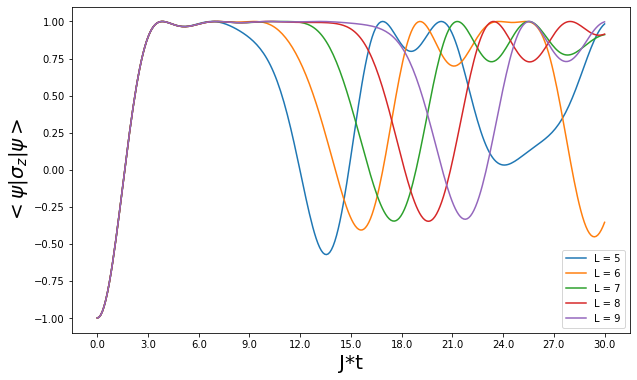

In [17]:
dt = 0.2
t = 60
times = np.linspace(0,t,int(t/dt))
plt.figure(figsize=(10,6))

for L in [5,6,7,8,9]:
    pauli = pauligen(L)
    H0 = -1/2*np.sum(pauli[2],axis=0) #this is the first sum
    H1=0
    
    for i in range(L-1):
        H1+=J/4*(pauli[0,i]@pauli[0,i+1]+pauli[1,i]@pauli[1,i+1])+V/2*(pauli[2,i]@pauli[2,i+1])
    
    H = np.real(H0+H1)
    
    
    init = np.zeros(2**L)     #creating the initial state
    init[int(len(init)/2)]=1
    states = [init]
    
    for i in range(1,len(times)):
        states.append(expm(-1j*H*dt).dot(states[i-1]))        #this is all the same stuff as before

    expec_z1 = [np.real(np.conjugate(x).dot(pauli[2,0]).dot(x)) for x in states]
    plt.plot(times,expec_z1,label = f'L = {L}')
    
    
plt.xticks(np.arange(0,66,6),labels=np.arange(0,66,6)/2)  #if jt=30, t=60
plt.xlabel('J*t',size=20)
plt.ylabel('$<\psi|\sigma_{z}|\psi>$',size=20)
plt.legend()
plt.show()

As we can see the expectation value of the first spin in the z direction begins to oscillate in all cases. It seems to take longer for the bigger spin chains to result in the oscillatory behaviour. As this is just a model of locally interacting spins perhaps this is due to the fact that any response to changes in other spins takes longer to reach any given spin in a longer chain though I'm not sure of this.

Here I will basically do the same but instead of looping over lengths I will loop over interaction strengths

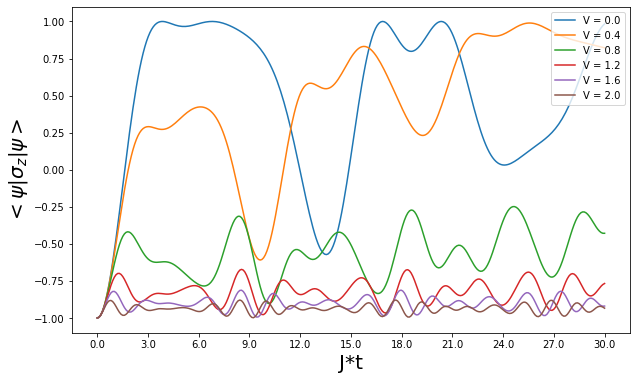

In [18]:
L=5
plt.figure(figsize=(10,6))
for V in np.linspace(0,2,6):
    pauli = pauligen(L)
    H0 = -1/2*np.sum(pauli[2],axis=0) #this is the first sum
    H1=0
    
    for i in range(L-1):
        H1+=J/4*(pauli[0,i]@pauli[0,i+1]+pauli[1,i]@pauli[1,i+1])+V/2*(pauli[2,i]@pauli[2,i+1])
    
    H = np.real(H0+H1)
    
    
    init = np.zeros(2**L)     #creating the initial state
    init[int(len(init)/2)]=1
    states = [init]
    
    for i in range(1,len(times)):
        states.append(expm(-1j*H*dt).dot(states[i-1]))        #this is all the same stuff as before

    expec_z1 = [np.real(np.conjugate(x).dot(pauli[2,0]).dot(x)) for x in states]
    plt.plot(times,expec_z1,label = f'V = {round(V,4)}')
    
    
plt.xticks(np.arange(0,66,6),labels=np.arange(0,66,6)/2)  #if jt=30, t=60
plt.xlabel('J*t',size=20)
plt.ylabel('$<\psi|\sigma_{z}|\psi>$',size=20)
plt.legend(loc=1)
plt.show()

We notice how when the value of V is turned up, the expectation value of the pauli z becomes "supressed" so to speak to the -1 value. This is probably due to the fact that this represents some external field strength, and the larger values is forcing the spin to take a certain value in the z direction, as if our spin chain is beoming magnetised.